# GeoPandas - gráficos y mapas

**Bibliotecas**

In [53]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins
from folium.plugins import HeatMapWithTime

**Variables globales**

In [54]:
# Archivo de datos con columnas del DwC (https://dwc.tdwg.org/terms/)
archivo_datos = "datos/ara-ambiguus-cr.csv"

# Nombre científico que se desplegará en los gráficos estadísticos
nombre_cientifico = "Ara ambiguus"

# Cantidad máxima de registros que se despliegan en un GeoDataFrame
pd.options.display.max_rows = 12

## Análisis de la información

### Graficación

In [55]:
# Estilo de los gráficos
plt.style.use('ggplot')

#### Distribución de registros por mes

In [56]:
# Reemplazo del número del mes por el nombre del mes
registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

registros_x_mes

January      46
February     49
March        37
April        24
May          22
June         30
July         41
August        7
September     5
October      14
November     25
December     22
Name: eventDate, dtype: int64

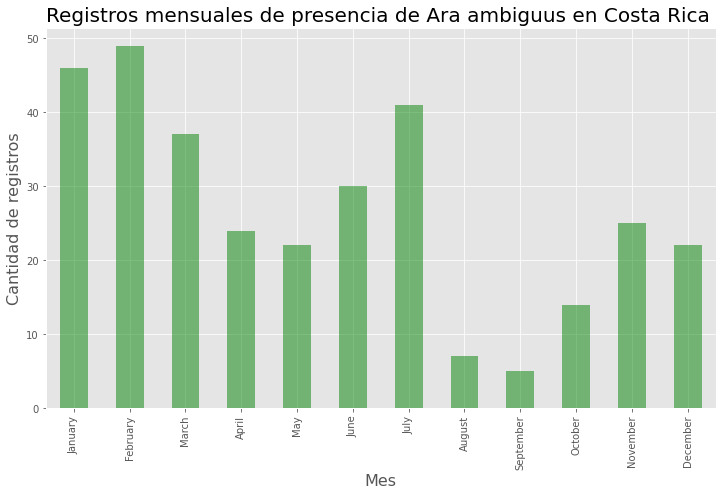

In [57]:
# Gráfico de barras
registros_x_mes.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros mensuales de presencia de ' + nombre_cientifico + ' en Costa Rica ', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [58]:
##Registro por año

In [59]:
# Agrupación de los registros por año
registros_x_año = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate

registros_x_año

eventDate
1933.0     2
2000.0     1
2001.0     2
2002.0     2
2003.0     1
          ..
2016.0    38
2017.0    33
2018.0    52
2019.0    86
2020.0     9
Name: eventDate, Length: 19, dtype: int64

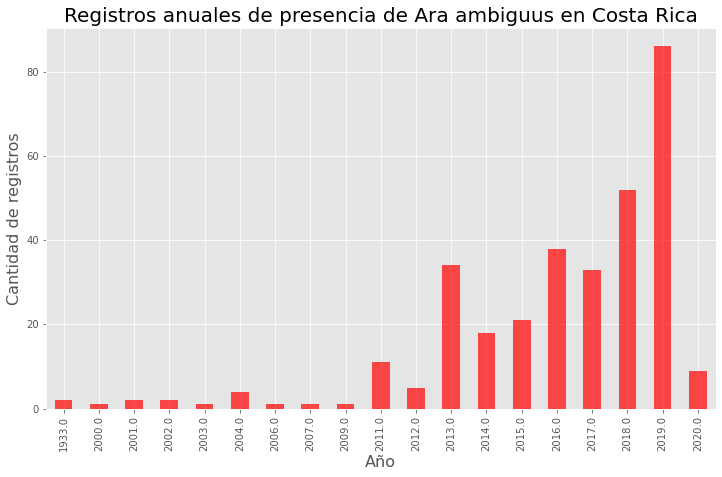

In [60]:
# Gráfico de barras
registros_x_año.plot(kind='bar', figsize=(12,7), color='red', alpha=0.7)

# Título y leyendas en los ejes
plt.title('Registros anuales de presencia de ' + nombre_cientifico + ' en Costa Rica', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

### Mapeo

#### GeoPandas

In [61]:
# Geodataframe
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)

C:\Users\PC\anaconda3\envs\leccion-12a\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


##### Mapa de puntos

In [62]:
# Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8, control_scale=True)
folium.TileLayer(
    tiles='CartoDB positron', 
    name='CartoDB positron').add_to(registros_presencia_mapa)


# Mapeo de los puntos correspondientes a los registros de presencia

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        [lat, lng],
        fill=True,
        popup=label,
        fill_color='darkred',
        fill_opacity=0.6, 
        icon=folium.Icon(color='green')
    ).add_to(registros_presencia_mapa)
    
#  Control de capas
folium.LayerControl().add_to(registros_presencia_mapa) 

registros_presencia_mapa

##### Mapa de "cluster"

In [63]:
# Mapa centrado en Costa Rica

registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8,  control_scale=True, )

folium.TileLayer(
    tiles='CartoDB positron', 
    name='CartoDB positron').add_to(registros_presencia_mapa)

# Instantiate a mark cluster object for the car accidents
registros_presencia_cluster = plugins.MarkerCluster().add_to(registros_presencia_mapa)


for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(registros_presencia_cluster)
    

    #  Control de capas

folium.LayerControl().add_to(registros_presencia_mapa) 


registros_presencia_mapa